In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp
import scipy.ndimage.filters
from scipy import signal
from PIL import Image
from PIL import ImageFilter
from scipy import signal
import sklearn.cluster
# from SimpleCV import Camera

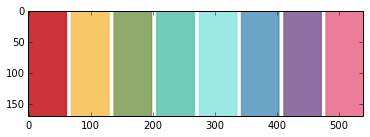

In [18]:
%matplotlib inline
im = Image.open('Images/Q2/colorful4.jpg')
plt.figure()
plt.imshow(np.asarray(im))

169 540 3


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


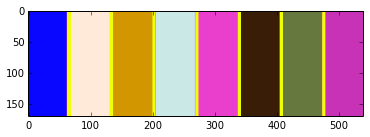

In [21]:
np.set_printoptions(threshold=np.nan)
    
def quantized(img,k):
    img = np.asarray(img)
    X = img.shape[0]
    Y = img.shape[1]
    Z = img.shape[2]
    print X, Y, Z
    #     creating kmeans object
    kmeans = sklearn.cluster.KMeans(k , max_iter = 5000, n_init = 40)
    #     smushing the 2d array of vectors to 1d array of vectors
    flat = np.reshape(img, (-1,3))
    #     fiting the model
    kmeans.fit(flat)
    #     predicting with our model
    predictions = kmeans.predict(flat)
    #     generate color values from our prediction from k centoid values
    colors = kmeans.cluster_centers_
    #     creating new quantized image
    newimg = np.zeros((X,Y,Z))
    predictions2d = np.reshape(predictions, (X, Y))
    for x in range(X):
        for y in range(Y):
            newimg[x][y] = colors[predictions2d[x][y]]
    return newimg

img = quantized(im,9)
%matplotlib inline
plt.figure()
plt.imshow(np.asarray(img))
